In [44]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
from keras.preprocessing import image
from keras.layers import Input, Flatten
import time


In [45]:
import os
os.chdir('/notebooks/src/CIFAR-10/')

In [46]:
from lib.load_images import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [47]:
input_tensor = Input(shape=(32, 32, 3))
model = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [49]:
for layer in model.layers:
    layer.trainable = False

In [50]:
# this could also be the output a different Keras model or layer
x = GlobalAveragePooling2D()(model.get_layer('block2_pool').output)
# x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
new_model = Model(inputs=input_tensor, outputs=predictions)
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [52]:
new_model.layers_by_depth

{0: [<keras.layers.core.Dense at 0x7ff414330b90>],
 1: [<keras.layers.core.Dense at 0x7ff4143a2e10>],
 2: [<keras.layers.pooling.GlobalAveragePooling2D at 0x7ff4143d73d0>],
 3: [<keras.layers.pooling.MaxPooling2D at 0x7ff39963cd10>],
 4: [<keras.layers.convolutional.Conv2D at 0x7ff399655310>],
 5: [<keras.layers.convolutional.Conv2D at 0x7ff399655650>],
 6: [<keras.layers.pooling.MaxPooling2D at 0x7ff39996d590>],
 7: [<keras.layers.convolutional.Conv2D at 0x7ff39996d850>],
 8: [<keras.layers.convolutional.Conv2D at 0x7ff39963cb10>],
 9: [<keras.engine.topology.InputLayer at 0x7ff39963ca90>]}

In [ ]:
history = new_model.fit(X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=.3,
    shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 555s - loss: 2.0223 - acc: 0.3278 - val_loss: 1.7731 - val_acc: 0.3882
Epoch 2/100
35000/35000 [==============================] - 552s - loss: 1.7499 - acc: 0.4091 - val_loss: 2.0519 - val_acc: 0.3487
Epoch 3/100
35000/35000 [==============================] - 411s - loss: 1.6876 - acc: 0.4358 - val_loss: 1.7645 - val_acc: 0.3873
Epoch 4/100
35000/35000 [==============================] - 568s - loss: 1.5989 - acc: 0.4523 - val_loss: 1.7255 - val_acc: 0.4003
Epoch 5/100
35000/35000 [==============================] - 576s - loss: 1.6249 - acc: 0.4536 - val_loss: 1.9726 - val_acc: 0.3879
Epoch 6/100
35000/35000 [==============================] - 576s - loss: 1.6810 - acc: 0.4533 - val_loss: 1.6508 - val_acc: 0.4667
Epoch 7/100
35000/35000 [==============================] - 375s - loss: 1.6654 - acc: 0.4585 - val_loss: 1.5339 - val_acc: 0.4850
Epoch 8/100
35000/35000 [===============

KeyboardInterrupt: 

In [55]:
# NOW FINE_TUNE THE MODEL

In [54]:
print('hello')

hello


In [58]:
for layer in new_model.layers:
    layer.trainable = True

In [61]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [ ]:
history = new_model.fit(X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=.3,
    shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 296s - loss: 1.1131 - acc: 0.6126 - val_loss: 1.1785 - val_acc: 0.5960
Epoch 2/10
35000/35000 [==============================] - 296s - loss: 1.1095 - acc: 0.6124 - val_loss: 1.1577 - val_acc: 0.6004
Epoch 3/10
35000/35000 [==============================] - 297s - loss: 1.1076 - acc: 0.6136 - val_loss: 1.2246 - val_acc: 0.5765
Epoch 4/10
35000/35000 [==============================] - 297s - loss: 1.1031 - acc: 0.6140 - val_loss: 1.2711 - val_acc: 0.5649
Epoch 5/10
35000/35000 [==============================] - 296s - loss: 1.1050 - acc: 0.6143 - val_loss: 1.1165 - val_acc: 0.6123
Epoch 6/10
34976/35000 [============================>.] - ETA: 0s - loss: 1.0944 - acc: 0.6169

In [66]:
print('Hello')

Hello


{'acc': [0.60219999998637608,
  0.60259999998637603,
  0.60405714284351897,
  0.60619999999999996,
  0.60580000001362388,
  0.60714285715648109,
  0.60871428570066177,
  0.61117142857142859,
  0.61034285714285719,
  0.6091142857279096],
 'loss': [1.1335583170209613,
  1.1324991530827113,
  1.1266944266455514,
  1.1249352088383267,
  1.1200061650684903,
  1.1212071582112995,
  1.1204647307940891,
  1.1133454549244473,
  1.1135014680862427,
  1.1152710829326085],
 'val_acc': [0.56440000003178914,
  0.55840000003178913,
  0.57673333333333332,
  0.59666666669845581,
  0.58806666665077212,
  0.60966666669845582,
  0.5926666666984558,
  0.56926666669845583,
  0.57053333333333334,
  0.59626666666666661],
 'val_loss': [1.2321699747721355,
  1.2513734901428222,
  1.2379048022588095,
  1.1548512625376384,
  1.1755767223358153,
  1.1187249091466267,
  1.1898009155909219,
  1.2673976317087809,
  1.3166861738840738,
  1.1813417530695598]}

In [67]:
os.chdir('/notebooks/src/CIFAR-10/')
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cnn_7_TL.h5'

In [68]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [21]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [22]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


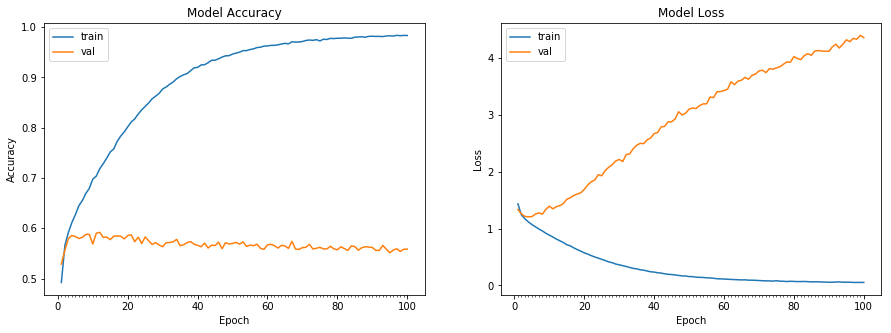

In [23]:
plot_model_history(history)